<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-07 21:08:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.5’

survey-data.csv.5   100%[===================>] 152.13M  54.2MB/s    in 2.8s    

2025-03-07 21:08:13 (54.2 MB/s) - ‘survey-data.csv.5’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


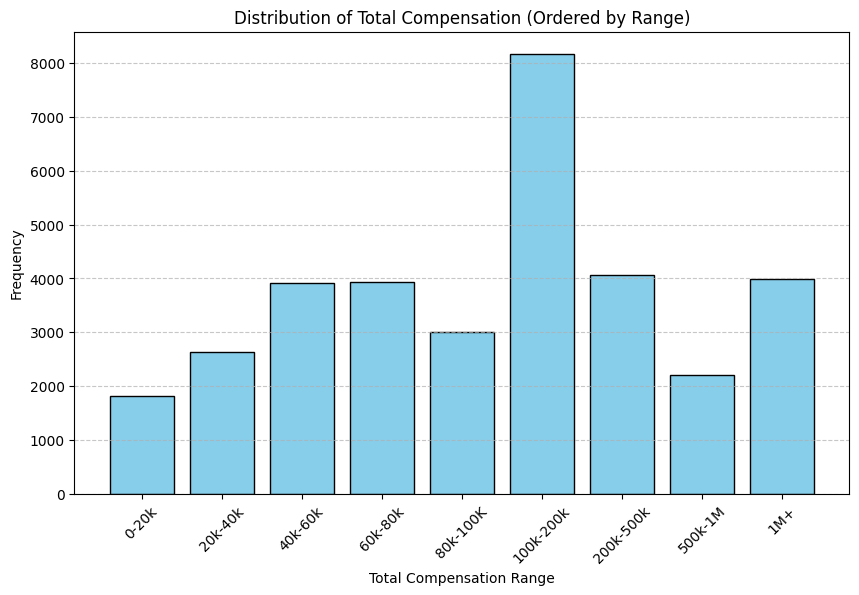

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define your SQL query
QUERY = """
SELECT 
    CASE 
         WHEN CompTotal < 20000 THEN '0-20k'
         WHEN CompTotal >= 20000 AND CompTotal < 40000 THEN '20k-40k'
         WHEN CompTotal >= 40000 AND CompTotal < 60000 THEN '40k-60k'
         WHEN CompTotal >= 60000 AND CompTotal < 80000 THEN '60k-80k'
         WHEN CompTotal >= 80000 AND CompTotal < 100000 THEN '80k-100K'
         WHEN CompTotal >= 100000 AND CompTotal < 200000 THEN '100k-200k'
         WHEN CompTotal >= 200000 AND CompTotal < 500000 THEN '200k-500k'
         WHEN CompTotal >= 500000 AND CompTotal < 1000000 THEN '500k-1M'
         ELSE '1M+'
    END AS CompTotalRange,
    COUNT(*) AS Frequency
FROM main
WHERE CompTotal IS NOT NULL
GROUP BY CompTotalRange;
"""

# Load the SQL results into a pandas DataFrame
df_CompTotal = pd.read_sql_query(QUERY, conn)

# Close the database connection
conn.close()

# Define the correct order for compensation ranges
comp_order = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100K', 
              '100k-200k', '200k-500k', '500k-1M', '1M+']

# Convert to categorical with proper ordering
df_CompTotal['CompTotalRange'] = pd.Categorical(df_CompTotal['CompTotalRange'], categories=comp_order, ordered=True)

# Sort DataFrame based on the defined order
df_CompTotal = df_CompTotal.sort_values('CompTotalRange')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_CompTotal['CompTotalRange'], df_CompTotal['Frequency'], color='skyblue', edgecolor='black')
plt.xlabel('Total Compensation Range')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation (Ordered by Range)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


**Box Plots**

Plot a box plot of Age.


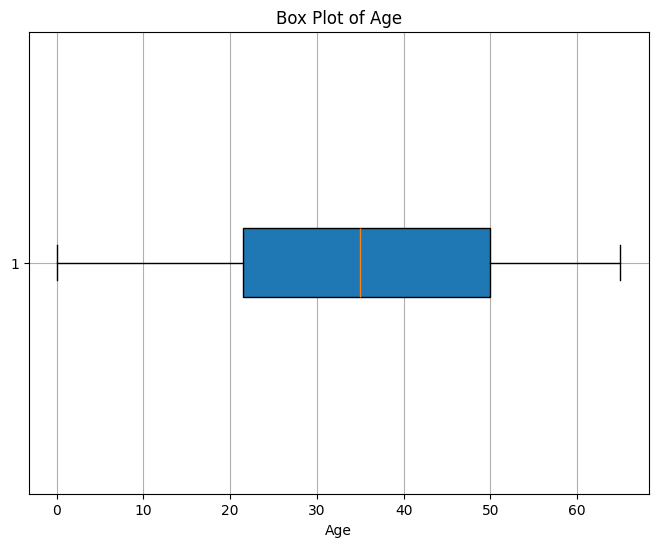

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query to select the Age column
query = """
SELECT 
    CAST(SUBSTR(Age, 1, INSTR(Age, ' ') - 1) AS INTEGER) AS NumericAge,
    COUNT(*) AS Frequency
FROM main
WHERE Age IS NOT NULL
GROUP BY NumericAge
ORDER BY NumericAge;
"""

# Execute the SQL query and load the results into a DataFrame
df_age = pd.read_sql_query(query, conn)
df_age.head(6)

# Close the database connection
conn.close()

# Plot the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_age['NumericAge'].dropna(), vert=False, patch_artist=True)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


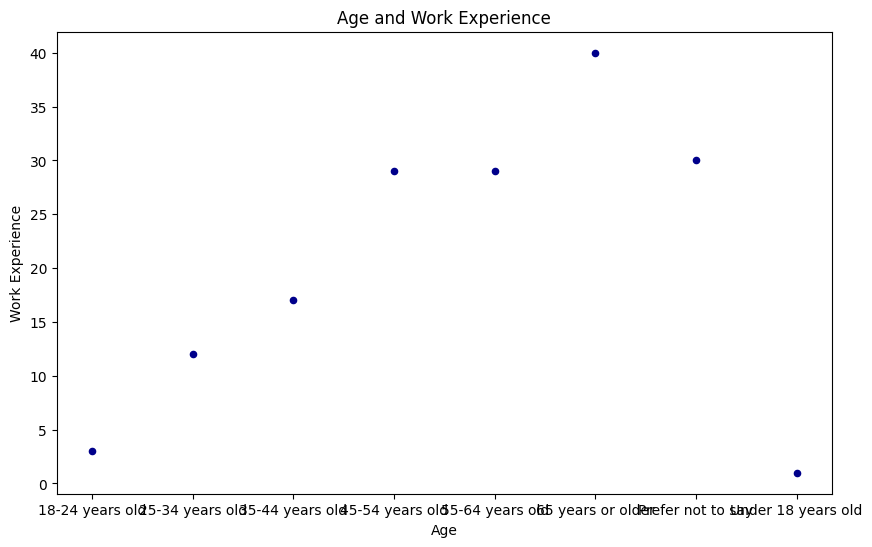

In [12]:
## Write your code here

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query to select the Age column
query = """

SELECT Age, WorkExp
FROM main
WHERE AGE IS NOT NULL AND WorkExp IS NOT NULL
GROUP BY 1
ORDER BY 1;
"""
# Execute the SQL query and load the results into a DataFrame
df_age_WorkExp = pd.read_sql_query(query, conn)
df_age_WorkExp.head(6)

# Close the database connection
conn.close()

# Create scatter plot
df_age_WorkExp.plot(kind='scatter', x='Age', y='WorkExp', figsize=(10, 6), color='darkblue')

plt.title('Age and Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')

plt.show()



**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [13]:
!pip install seaborn
import seaborn as sns


In [14]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query to select the Frustration column
query = """
SELECT TimeSearching
FROM main
WHERE TimeSearching IS NOT NULL;
"""

# Execute the SQL query and load the results into a DataFrame
df_timesearching = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Get the unique values and their counts
timesearching_counts = df_timesearching['TimeSearching'].value_counts()

# Print the unique values and their counts
print(timesearching_counts)

TimeSearching
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64


                  Age  TimeSearching           Frustration  Age_Numeric  \
0  Under 18 years old              5                  None           10   
1     18-24 years old             15      Amt of Tech Debt           22   
2     25-34 years old             25  Reliability of tools           30   
3     35-44 years old             35    Complex tech stack           40   
4     45-54 years old             45                Always           50   
5  55-64 years old :)             55         Tracking work           60   
6   65 years or older             65                  None           70   
7   Prefer not to say             75                Always           80   

   Frustration_Numeric  
0                    0  
1                    1  
2                    2  
3                    3  
4                    4  
5                    5  
6                    0  
7                    4  


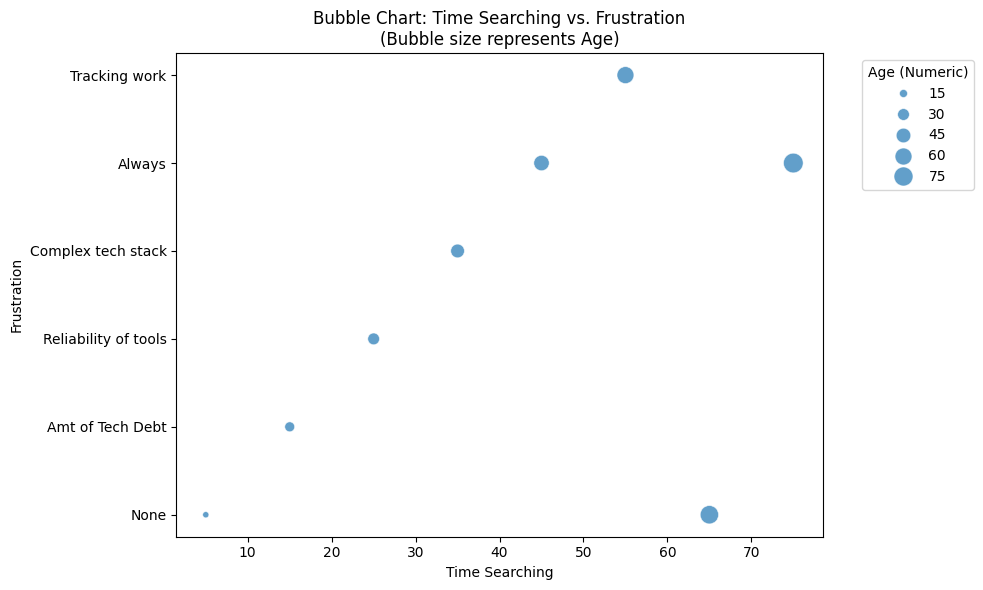

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data with frustration attributes as text
data = {
    'Age': [
        'Under 18 years old', '18-24 years old', '25-34 years old',
        '35-44 years old', '45-54 years old', '55-64 years old :)',
        '65 years or older', 'Prefer not to say'
    ],
    'TimeSearching': [5, 15, 25, 35, 45, 55, 65, 75],  # Example values
    'Frustration': [
        'None', 'Amt of Tech Debt', 'Reliability of tools', 
        'Complex tech stack', 'Always', 'Tracking work', 
        'None', 'Always'
    ]
}
df = pd.DataFrame(data)

# Convert Age to numeric using a mapping
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 22,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old :)': 60,
    '65 years or older': 70,
    'Prefer not to say': 80
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

# Map Frustration text to numeric values.
# You can define an order that makes sense for your analysis.
frustration_mapping = {
    'None': 0,
    'Amt of Tech Debt': 1,
    'Reliability of tools': 2,
    'Complex tech stack': 3,
    'Always': 4,
    'Tracking work': 5
}
df['Frustration_Numeric'] = df['Frustration'].map(frustration_mapping)

print(df)  # Inspect the DataFrame to see the new numeric columns

# Create the bubble chart:
plt.figure(figsize=(10, 6))
bubble_plot = sns.scatterplot(
    x='TimeSearching',
    y='Frustration_Numeric',  # Use numeric values for plotting positions
    size='Age_Numeric',       # Bubble size represents Age
    sizes=(20, 200),          # Adjust the size range as needed
    data=df,
    alpha=0.7
)

plt.title('Bubble Chart: Time Searching vs. Frustration\n(Bubble size represents Age)')
plt.xlabel('Time Searching')
plt.ylabel('Frustration')
# Change the y-axis ticks back to the actual frustration text labels
plt.yticks(list(frustration_mapping.values()), list(frustration_mapping.keys()))
plt.legend(title='Age (Numeric)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


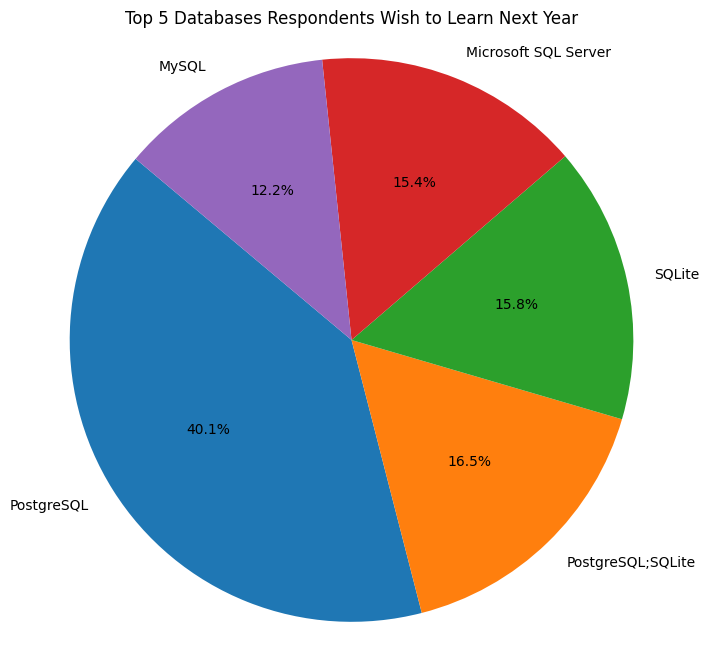

In [16]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query to count the occurrences of each database
query = """
SELECT DatabaseWantToWorkWith, COUNT(*) as Count
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
GROUP BY DatabaseWantToWorkWith
ORDER BY Count DESC
LIMIT 5;
"""

# Execute the SQL query and load the results into a DataFrame
df_databases = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_databases['Count'], labels=df_databases['DatabaseWantToWorkWith'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


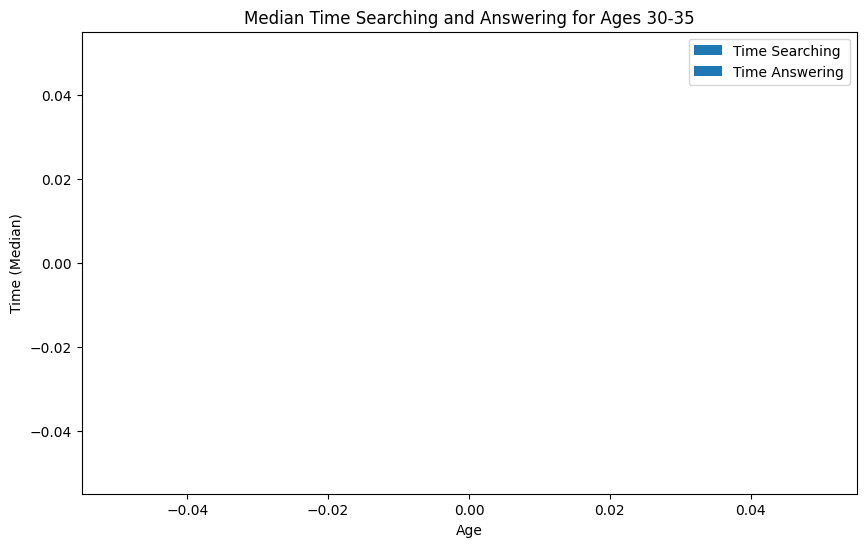

In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query to select data for overlapping age groups
query = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE Age IN ('25-34 years old', '35-44 years old')
AND TimeSearching IS NOT NULL
AND TimeAnswering IS NOT NULL;
"""

# Execute the SQL query and load the results into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Function to extract the lower bound of the age range
def extract_age(age_str):
    if isinstance(age_str, str):
        return int(age_str.split('-')[0])
    return age_str

# Apply the function to the Age column
df['Age'] = df['Age'].apply(extract_age)

# Convert TimeSearching and TimeAnswering to numeric, coercing errors to NaN
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['TimeAnswering'] = pd.to_numeric(df['TimeAnswering'], errors='coerce')

# Drop rows with NaN values in Age, TimeSearching, or TimeAnswering
df = df.dropna(subset=['Age', 'TimeSearching', 'TimeAnswering'])

# Filter the DataFrame for ages 30 to 35
df_30_35 = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Calculate the median TimeSearching and TimeAnswering for each age
median_times = df_30_35.groupby('Age').median()

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_times.index, median_times['TimeSearching'], label='Median Time Searching', color='skyblue')
plt.bar(median_times.index, median_times['TimeAnswering'], bottom=median_times['TimeSearching'], label='Median Time Answering', color='lightcoral')

plt.title('Stacked Bar Chart of Median Time Searching and Answering (Ages 30-35)')
plt.xlabel('Age')
plt.ylabel('Median Time (minutes)')
plt.legend()
plt.show()

### 

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


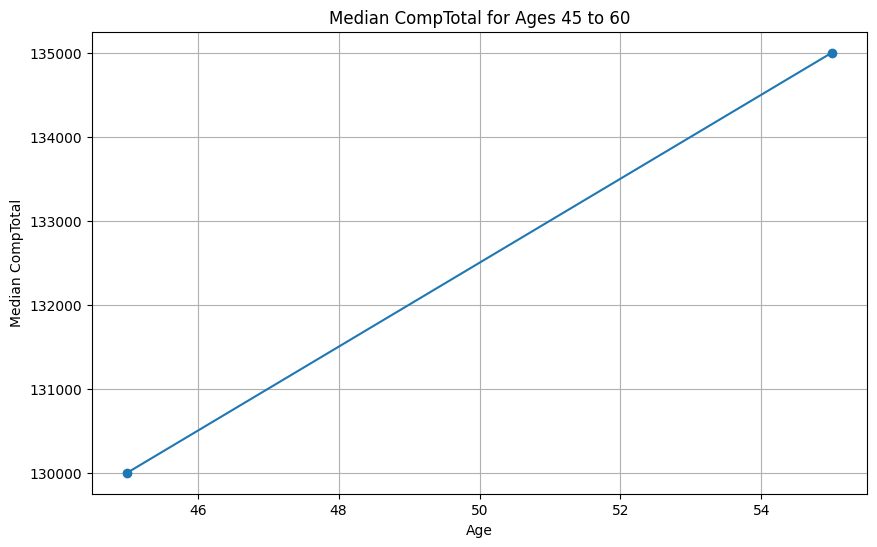

In [21]:
## Write your code here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query to select relevant data
query = """
SELECT Age, CompTotal
FROM main
WHERE Age BETWEEN '45-54 years old' AND '55-64 years old'
AND CompTotal IS NOT NULL;
"""

# Execute the SQL query and load the results into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Function to extract the lower bound of the age range
def extract_age(age_str):
    if isinstance(age_str, str):
        return int(age_str.split('-')[0])
    return age_str

# Apply the function to the Age column
df['Age'] = df['Age'].apply(extract_age)

# Convert CompTotal to numeric, coercing errors to NaN
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop rows with NaN values in Age or CompTotal
df = df.dropna(subset=['Age', 'CompTotal'])

# Filter the DataFrame for ages 45 to 60
df_45_60 = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Calculate the median CompTotal for each age
median_comptotal = df_45_60.groupby('Age')['CompTotal'].median()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comptotal.index, median_comptotal.values, marker='o', linestyle='-')
plt.title('Median CompTotal for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median CompTotal')
plt.grid(True)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


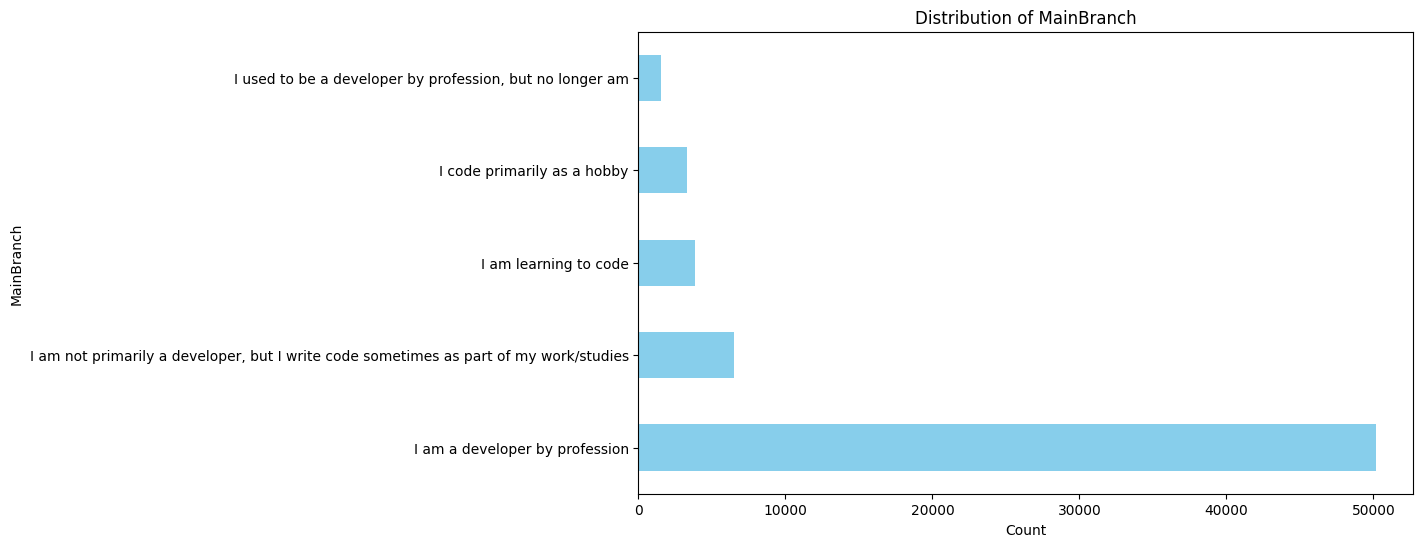

In [23]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define the SQL query to select the MainBranch column
query = """
SELECT MainBranch
FROM main
WHERE MainBranch IS NOT NULL;
"""

# Execute the SQL query and load the results into a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Count the occurrences of each unique value in the MainBranch column
mainbranch_counts = df['MainBranch'].value_counts()

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of MainBranch')
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
